In [29]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from fastai.imports import *
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

In [2]:
train_raw = pd.read_csv('intermediate_data/raw_train.csv')
test_raw = pd.read_csv('intermediate_data/raw_test.csv')
x_trn3 = train_raw.drop(['stroke', 'age_bins'], axis=1)
y_trn3 = train_raw['stroke'].values

In [4]:
# cols = ['heart_disease', 'id', 'bmi', 'avg_glucose_level', 'age']
# x_trn3 = x_trn3[cols]

In [5]:
x_trn3[:1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,-1


In [31]:
x_trn, x_val, y_trn, y_val = train_test_split(x_trn3, y_trn3, stratify=y_trn3 , test_size=0.25, random_state=1)

In [33]:
def auc(m, train, test): 
    return (metrics.roc_auc_score(y_trn,m.predict_proba(x_trn)[:,1]),
                            metrics.roc_auc_score(y_val,m.predict_proba(x_val)[:,1]))

In [32]:
x_trn.shape

(32550, 11)

In [34]:
cat_features_index = [1, 3, 4, 5, 6, 7, 10]

In [26]:
# params = {'depth': [4, 7, 10],
#           'learning_rate' : [0.05, 0.1, 0.5],
#          'l2_leaf_reg': [1,3,5,9],
#          'iterations': [100]}

# cb = CatBoostClassifier()
# cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 5)

# cb_model.fit(x_trn3, y_trn3)

## 1

In [50]:
#With Categorical features
clf = CatBoostClassifier(eval_metric="AUC",one_hot_max_size=10, \
                            depth=10, iterations= 150, l2_leaf_reg= 5, learning_rate= 0.05)
clf.fit(x_trn,y_trn, cat_features= cat_features_index)

0:	learn: 0.7885455	total: 269ms	remaining: 40.1s
1:	learn: 0.7992109	total: 366ms	remaining: 27.1s
2:	learn: 0.8413813	total: 452ms	remaining: 22.2s
3:	learn: 0.8497339	total: 637ms	remaining: 23.3s
4:	learn: 0.8557354	total: 829ms	remaining: 24s
5:	learn: 0.8537295	total: 906ms	remaining: 21.7s
6:	learn: 0.8531899	total: 1.06s	remaining: 21.6s
7:	learn: 0.8533276	total: 1.33s	remaining: 23.6s
8:	learn: 0.8533409	total: 1.4s	remaining: 21.9s
9:	learn: 0.8527621	total: 1.56s	remaining: 21.8s
10:	learn: 0.8516310	total: 1.68s	remaining: 21.2s
11:	learn: 0.8573673	total: 1.95s	remaining: 22.4s
12:	learn: 0.8561352	total: 2.11s	remaining: 22.2s
13:	learn: 0.8564284	total: 2.22s	remaining: 21.5s
14:	learn: 0.8557756	total: 2.28s	remaining: 20.5s
15:	learn: 0.8558928	total: 2.49s	remaining: 20.9s
16:	learn: 0.8561960	total: 2.56s	remaining: 20.1s
17:	learn: 0.8553190	total: 2.63s	remaining: 19.3s
18:	learn: 0.8540692	total: 2.71s	remaining: 18.7s
19:	learn: 0.8536739	total: 2.79s	remaining:

In [51]:
auc(clf, x_trn, x_val)

(0.9390013932740906, 0.8751489332357685)

## 2

In [45]:
#With Categorical features
clf2 = CatBoostClassifier(eval_metric="AUC",one_hot_max_size=10, \
                            depth=10, iterations= 70, l2_leaf_reg= 5, learning_rate= 0.1)
clf2.fit(x_trn,y_trn, cat_features= cat_features_index)

0:	learn: 0.6002934	total: 122ms	remaining: 8.45s
1:	learn: 0.7711036	total: 219ms	remaining: 7.43s
2:	learn: 0.7891402	total: 291ms	remaining: 6.49s
3:	learn: 0.7848290	total: 375ms	remaining: 6.19s
4:	learn: 0.7778342	total: 440ms	remaining: 5.72s
5:	learn: 0.7945216	total: 563ms	remaining: 6s
6:	learn: 0.8273817	total: 654ms	remaining: 5.88s
7:	learn: 0.8316328	total: 747ms	remaining: 5.79s
8:	learn: 0.8308204	total: 881ms	remaining: 5.97s
9:	learn: 0.8323457	total: 980ms	remaining: 5.88s
10:	learn: 0.8381485	total: 1.07s	remaining: 5.75s
11:	learn: 0.8422871	total: 1.24s	remaining: 5.99s
12:	learn: 0.8469661	total: 1.44s	remaining: 6.3s
13:	learn: 0.8463734	total: 1.56s	remaining: 6.24s
14:	learn: 0.8470932	total: 1.77s	remaining: 6.49s
15:	learn: 0.8477303	total: 1.92s	remaining: 6.47s
16:	learn: 0.8477925	total: 2s	remaining: 6.23s
17:	learn: 0.8479523	total: 2.07s	remaining: 5.98s
18:	learn: 0.8482611	total: 2.14s	remaining: 5.75s
19:	learn: 0.8499508	total: 2.26s	remaining: 5.6

In [46]:
auc(clf2, x_trn, x_val)

(0.9324203704229779, 0.8721697896353963)

### 3

In [52]:
#With Categorical features
clf3 = CatBoostClassifier(eval_metric="AUC",one_hot_max_size=10, \
                            depth=10, iterations= 250, l2_leaf_reg= 5, learning_rate= 0.05)
clf3.fit(x_trn,y_trn, cat_features= cat_features_index)

0:	learn: 0.6656594	total: 75.2ms	remaining: 18.7s
1:	learn: 0.7600207	total: 166ms	remaining: 20.6s
2:	learn: 0.7596094	total: 228ms	remaining: 18.7s
3:	learn: 0.7703101	total: 368ms	remaining: 22.6s
4:	learn: 0.8388601	total: 603ms	remaining: 29.5s
5:	learn: 0.8336936	total: 671ms	remaining: 27.3s
6:	learn: 0.8361890	total: 764ms	remaining: 26.5s
7:	learn: 0.8371932	total: 990ms	remaining: 30s
8:	learn: 0.8345065	total: 1.07s	remaining: 28.7s
9:	learn: 0.8327814	total: 1.14s	remaining: 27.4s
10:	learn: 0.8315510	total: 1.25s	remaining: 27.1s
11:	learn: 0.8304191	total: 1.32s	remaining: 26.2s
12:	learn: 0.8424868	total: 1.45s	remaining: 26.4s
13:	learn: 0.8400482	total: 1.53s	remaining: 25.8s
14:	learn: 0.8369169	total: 1.61s	remaining: 25.3s
15:	learn: 0.8381806	total: 1.69s	remaining: 24.7s
16:	learn: 0.8356736	total: 1.82s	remaining: 25s
17:	learn: 0.8362790	total: 1.94s	remaining: 25s
18:	learn: 0.8357789	total: 2.08s	remaining: 25.3s
19:	learn: 0.8407248	total: 2.3s	remaining: 26

161:	learn: 0.9399571	total: 27.4s	remaining: 14.9s
162:	learn: 0.9400965	total: 27.6s	remaining: 14.7s
163:	learn: 0.9402343	total: 27.8s	remaining: 14.6s
164:	learn: 0.9404941	total: 28s	remaining: 14.4s
165:	learn: 0.9407121	total: 28.2s	remaining: 14.3s
166:	learn: 0.9407587	total: 28.4s	remaining: 14.1s
167:	learn: 0.9409212	total: 28.6s	remaining: 13.9s
168:	learn: 0.9412115	total: 28.8s	remaining: 13.8s
169:	learn: 0.9415992	total: 29s	remaining: 13.7s
170:	learn: 0.9419304	total: 29.2s	remaining: 13.5s
171:	learn: 0.9419789	total: 29.3s	remaining: 13.3s
172:	learn: 0.9422483	total: 29.5s	remaining: 13.1s
173:	learn: 0.9424799	total: 29.7s	remaining: 13s
174:	learn: 0.9427095	total: 29.9s	remaining: 12.8s
175:	learn: 0.9427290	total: 30s	remaining: 12.6s
176:	learn: 0.9428976	total: 30.2s	remaining: 12.4s
177:	learn: 0.9434671	total: 30.4s	remaining: 12.3s
178:	learn: 0.9438010	total: 30.6s	remaining: 12.1s
179:	learn: 0.9440258	total: 30.8s	remaining: 12s
180:	learn: 0.9443694	

In [53]:
auc(clf3, x_trn, x_val)

(0.9631769719257484, 0.8654639629457941)

Ok. It is decreasing if we increase trees more. 

### 4 L2_Leaf

In [54]:
clf4 = CatBoostClassifier(eval_metric="AUC",one_hot_max_size=10, \
                            depth=10, iterations= 150, l2_leaf_reg= 7, learning_rate= 0.05)
clf4.fit(x_trn,y_trn, cat_features= cat_features_index)

0:	learn: 0.5927187	total: 59.7ms	remaining: 8.9s
1:	learn: 0.7549602	total: 126ms	remaining: 9.29s
2:	learn: 0.7610319	total: 162ms	remaining: 7.93s
3:	learn: 0.7673652	total: 224ms	remaining: 8.18s
4:	learn: 0.7676992	total: 260ms	remaining: 7.53s
5:	learn: 0.7677435	total: 316ms	remaining: 7.59s
6:	learn: 0.7724094	total: 367ms	remaining: 7.49s
7:	learn: 0.7768837	total: 417ms	remaining: 7.39s
8:	learn: 0.7859180	total: 638ms	remaining: 10s
9:	learn: 0.7892351	total: 717ms	remaining: 10s
10:	learn: 0.8028396	total: 827ms	remaining: 10.5s
11:	learn: 0.8029993	total: 930ms	remaining: 10.7s
12:	learn: 0.8115399	total: 1.09s	remaining: 11.5s
13:	learn: 0.8123534	total: 1.14s	remaining: 11.1s
14:	learn: 0.8217077	total: 1.2s	remaining: 10.8s
15:	learn: 0.8208418	total: 1.24s	remaining: 10.4s
16:	learn: 0.8231140	total: 1.3s	remaining: 10.2s
17:	learn: 0.8369585	total: 1.4s	remaining: 10.3s
18:	learn: 0.8415257	total: 1.49s	remaining: 10.3s
19:	learn: 0.8414684	total: 1.54s	remaining: 10s

In [55]:
auc(clf4, x_trn, x_val)

(0.9312888981888716, 0.877009880355371)

Increased with l2reg = 7

### 5 Depth

In [56]:
clf5 = CatBoostClassifier(eval_metric="AUC",one_hot_max_size=10, \
                            depth=7, iterations= 150, l2_leaf_reg= 7, learning_rate= 0.05)
clf5.fit(x_trn,y_trn, cat_features= cat_features_index)

0:	learn: 0.6278429	total: 81.9ms	remaining: 12.2s
1:	learn: 0.8141540	total: 144ms	remaining: 10.7s
2:	learn: 0.8324737	total: 185ms	remaining: 9.04s
3:	learn: 0.8331619	total: 229ms	remaining: 8.38s
4:	learn: 0.8316595	total: 271ms	remaining: 7.87s
5:	learn: 0.8311829	total: 328ms	remaining: 7.87s
6:	learn: 0.8296119	total: 387ms	remaining: 7.9s
7:	learn: 0.8311728	total: 444ms	remaining: 7.88s
8:	learn: 0.8262168	total: 493ms	remaining: 7.71s
9:	learn: 0.8262222	total: 562ms	remaining: 7.86s
10:	learn: 0.8222453	total: 617ms	remaining: 7.79s
11:	learn: 0.8222095	total: 654ms	remaining: 7.52s
12:	learn: 0.8198739	total: 695ms	remaining: 7.32s
13:	learn: 0.8316475	total: 754ms	remaining: 7.33s
14:	learn: 0.8296611	total: 823ms	remaining: 7.41s
15:	learn: 0.8328036	total: 879ms	remaining: 7.36s
16:	learn: 0.8377211	total: 923ms	remaining: 7.22s
17:	learn: 0.8406988	total: 978ms	remaining: 7.17s
18:	learn: 0.8430057	total: 1.02s	remaining: 7.02s
19:	learn: 0.8438768	total: 1.11s	remaini

In [57]:
auc(clf5, x_trn, x_val)

(0.9040739236343385, 0.877721503469043)

### 6. Select depth=5, ite=150, lr=0.05, leaf=7

In [68]:
clf5 = CatBoostClassifier(eval_metric="AUC",one_hot_max_size=10, \
                            depth=5, iterations= 150, l2_leaf_reg= 3, learning_rate= 0.05)
clf5.fit(x_trn,y_trn, cat_features= cat_features_index)

0:	learn: 0.5109509	total: 56.4ms	remaining: 8.41s
1:	learn: 0.6781719	total: 95.1ms	remaining: 7.04s
2:	learn: 0.7510306	total: 132ms	remaining: 6.48s
3:	learn: 0.7496503	total: 170ms	remaining: 6.2s
4:	learn: 0.7487177	total: 198ms	remaining: 5.73s
5:	learn: 0.7434174	total: 232ms	remaining: 5.58s
6:	learn: 0.7444393	total: 264ms	remaining: 5.4s
7:	learn: 0.7880951	total: 323ms	remaining: 5.74s
8:	learn: 0.7893203	total: 360ms	remaining: 5.64s
9:	learn: 0.7930998	total: 399ms	remaining: 5.58s
10:	learn: 0.8249472	total: 435ms	remaining: 5.5s
11:	learn: 0.8254727	total: 472ms	remaining: 5.42s
12:	learn: 0.8361597	total: 551ms	remaining: 5.8s
13:	learn: 0.8353364	total: 591ms	remaining: 5.74s
14:	learn: 0.8401869	total: 629ms	remaining: 5.66s
15:	learn: 0.8371258	total: 664ms	remaining: 5.56s
16:	learn: 0.8358342	total: 732ms	remaining: 5.72s
17:	learn: 0.8347121	total: 768ms	remaining: 5.63s
18:	learn: 0.8334275	total: 798ms	remaining: 5.5s
19:	learn: 0.8328990	total: 838ms	remaining:

In [69]:
auc(clf5, x_trn, x_val)

(0.8841108391884761, 0.8780576807407777)

In [70]:
preds = clf5.predict_proba(test_raw)[:,1]

(array([15097.,  1892.,   956.,   385.,   165.,    56.,    28.,    11.,     7.,     4.]),
 array([0.00005, 0.02878, 0.0575 , 0.08622, 0.11495, 0.14367, 0.17239, 0.20112, 0.22984, 0.25856, 0.28728]),
 <a list of 10 Patch objects>)

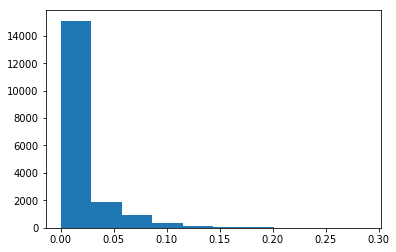

In [71]:
plt.hist(preds)

In [72]:
preds.mean()

0.017303183514345743

In [73]:
pred_df = pd.DataFrame(test_raw.id)
pred_df['stroke'] = preds
pred_df.to_csv('submissions/cat_manual_tuning.csv', index=False)